# Libraries which we use

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau, spearmanr, pearsonr
from sklearn.feature_selection import mutual_info_regression
import phik
from phik import significance_matrix
from phik.report import plot_correlation_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import HuberRegressor, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import shap
from sklearn.tree import *
import optuna
import importlib
import Project_6_moduls as P6
importlib.reload(P6)
import warnings
warnings.filterwarnings("ignore")

# EDA

In [ ]:
train = pd.read_csv("train_reg.csv", index_col=0)
test = pd.read_csv("test_reg.csv", index_col = 0)
seed=1

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
train.columns

## Features Unit Description

1. **Clonesize** - m2 The average blueberry clone size in the field
2. **Honeybee** - bees/m2/min Honeybee density in the field
3. **Bumbles** - bees/m2/min Bumblebee density in the field
4. **Andrena** - bees/m2/min Andrena bee density in the field
5. **Osmia** - bees/m2/min Osmia bee density in the field
6. **MaxOfUpperTRange** - ℃ The highest record of the upper band daily air temperature during the bloom season
7. **MinOfUpperTRange** - ℃ The lowest record of the upper band daily air temperature
8. **AverageOfUpperTRange** - ℃ The average of the upper band daily air temperature
9. **MaxOfLowerTRange** - ℃ The highest record of the lower band daily air temperature
10. **MinOfLowerTRange** - ℃ The lowest record of the lower band daily air temperature
11. **AverageOfLowerTRange** - ℃ The average of the lower band daily air temperature
12. **RainingDays** - Day The total number of days during the bloom season, each of which has precipitation larger than zero
13. **AverageRainingDays** - Day The average of raining days of the entire bloom season

## Описание столбцов

1. **Clonesize** - м²: Средний размер клона черники на поле
2. **Honeybee** - пчел/м²/мин: Плотность медоносных пчел на поле
3. **Bumbles** - пчел/м²/мин: Плотность шмелей на поле
4. **Andrena** - пчел/м²/мин: Плотность пчел рода Андрена на поле
5. **Osmia** - пчел/м²/мин: Плотность пчел рода Осмия на поле
6. **MaxOfUpperTRange** - ℃: Максимальная температура верхнего диапазона дневной температуры воздуха во время цветения
7. **MinOfUpperTRange** - ℃: Минимальная температура верхнего диапазона дневной температуры воздуха
8. **AverageOfUpperTRange** - ℃: Средняя температура верхнего диапазона дневной температуры воздуха
9. **MaxOfLowerTRange** - ℃: Максимальная температура нижнего диапазона дневной температуры воздуха
10. **MinOfLowerTRange** - ℃: Минимальная температура нижнего диапазона дневной температуры воздуха
11. **AverageOfLowerTRange** - ℃: Средняя температура нижнего диапазона дневной температуры воздуха
12. **RainingDays** - Дней: Общее количество дней с осадками больше нуля во время цветения
13. **AverageRainingDays** - Дней: Среднее количество дождливых дней за весь период цветения
14. **fruitset** - Завязывание плодов
15. **fruitmass** - Масса плодов
16. **seeds** - Семена
17. **yield** - Урожайность

## Analyzing train and test datasets

In [ ]:
train

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.489723,0.435764,34.769578,5628.71053
14996,131.0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.506988,0.458076,36.362837,6331.86722
14997,444.0,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.00,0.10,0.615612,0.514570,45.718182,8413.65966


In [ ]:
print(train['Row#'].nunique())
print(train['yield'].nunique())

In [ ]:
train[train['yield'] == train['yield'][0]]

"Row" bilan "yield" ustunlariniko'rib oldik. Sintaksis dataligiga ishonchimiz yanada ortdi

In [ ]:
train.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,427.577533,19.773500,0.388500,0.284573,0.486751,0.591612,82.245667,49.719033,68.717353,59.282947,28.686927,48.611360,18.804700,0.327261,0.501015,0.445967,36.115335,6022.687345
std,214.127422,6.644451,0.390162,0.058855,0.147560,0.144194,9.104125,5.519865,7.606632,6.579928,3.180584,5.371006,11.880294,0.166934,0.077379,0.038092,4.121393,1362.796312
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,56.800000,50.200000,24.300000,30.000000,1.000000,0.060000,0.029066,0.217545,22.079199,1637.704020
25%,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418220,33.239806,5124.854900
50%,469.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506225,0.446518,36.040675,6107.382470
75%,598.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472271,39.099614,7028.673500
max,777.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.960586,0.645475,46.369344,8969.401840


In [ ]:
test.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,426.401100,19.803850,0.383252,0.284882,0.483925,0.591296,82.357400,49.787840,68.813790,59.365270,28.726260,48.67664,18.621887,0.324195,0.500954,0.446376,36.133856
std,214.493077,6.745243,0.239175,0.058984,0.146723,0.146262,9.081485,5.504862,7.586462,6.563932,3.172329,5.35508,11.770499,0.165148,0.076629,0.037926,4.125822
min,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,42.100000,58.200000,50.200000,24.300000,30.00000,1.000000,0.060000,0.163652,0.249031,22.079199
25%,243.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.80000,16.000000,0.260000,0.451083,0.419519,33.239806
50%,466.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.80000,16.000000,0.260000,0.506190,0.446570,36.018624
75%,597.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.80000,24.000000,0.390000,0.564795,0.473089,39.106526
max,776.000000,120.000000,18.430000,0.585000,0.830000,0.830000,94.600000,57.200000,79.000000,72.900000,33.000000,55.90000,34.000000,0.560000,0.652144,0.631790,46.718182


#### Nulllari borligini va ma'lumot turini ko'ramiz

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  15000 non-null  float64
 1   clonesize             15000 non-null  float64
 2   honeybee              15000 non-null  float64
 3   bumbles               15000 non-null  float64
 4   andrena               15000 non-null  float64
 5   osmia                 15000 non-null  float64
 6   MaxOfUpperTRange      15000 non-null  float64
 7   MinOfUpperTRange      15000 non-null  float64
 8   AverageOfUpperTRange  15000 non-null  float64
 9   MaxOfLowerTRange      15000 non-null  float64
 10  MinOfLowerTRange      15000 non-null  float64
 11  AverageOfLowerTRange  15000 non-null  float64
 12  RainingDays           15000 non-null  float64
 13  AverageRainingDays    15000 non-null  float64
 14  fruitset              15000 non-null  float64
 15  fruitmass             15

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15000 to 24999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  10000 non-null  float64
 1   clonesize             10000 non-null  float64
 2   honeybee              10000 non-null  float64
 3   bumbles               10000 non-null  float64
 4   andrena               10000 non-null  float64
 5   osmia                 10000 non-null  float64
 6   MaxOfUpperTRange      10000 non-null  float64
 7   MinOfUpperTRange      10000 non-null  float64
 8   AverageOfUpperTRange  10000 non-null  float64
 9   MaxOfLowerTRange      10000 non-null  float64
 10  MinOfLowerTRange      10000 non-null  float64
 11  AverageOfLowerTRange  10000 non-null  float64
 12  RainingDays           10000 non-null  float64
 13  AverageRainingDays    10000 non-null  float64
 14  fruitset              10000 non-null  float64
 15  fruitmass           

In [ ]:
train.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
test.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [ ]:
train["yield"].describe()

count    15000.000000
mean      6022.687345
std       1362.796312
min       1637.704020
25%       5124.854900
50%       6107.382470
75%       7028.673500
max       8969.401840
Name: yield, dtype: float64

### features nuniques

In [ ]:
train.nunique()

Row#                     776
clonesize                  6
honeybee                   7
bumbles                    9
andrena                   10
osmia                     13
MaxOfUpperTRange           6
MinOfUpperTRange           7
AverageOfUpperTRange       6
MaxOfLowerTRange           5
MinOfLowerTRange           5
AverageOfLowerTRange       9
RainingDays                5
AverageRainingDays         6
fruitset                1084
fruitmass               1112
seeds                   1233
yield                    777
dtype: int64

In [ ]:
test.nunique()

Row#                     770
clonesize                  6
honeybee                   7
bumbles                   11
andrena                   13
osmia                     11
MaxOfUpperTRange           5
MinOfUpperTRange           5
AverageOfUpperTRange       5
MaxOfLowerTRange           6
MinOfLowerTRange           4
AverageOfLowerTRange       8
RainingDays                5
AverageRainingDays         6
fruitset                 991
fruitmass                973
seeds                   1091
dtype: int64

## Correlations

In [ ]:
df = train.copy()
df1 = df.copy()

### Pearson corr

In [ ]:
df = df[df.drop("yield", axis=1).columns.tolist()+['yield']]
df[['yield'] + df.drop("yield", axis=1).columns.tolist()].corr()

,yield,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
yield,1.000000,-0.023540,-0.414196,-0.107869,0.177281,0.122463,0.271989,-0.004252,-0.004008,-0.003666,-0.004082,-0.004109,-0.003878,-0.506675,-0.517130,0.950373,0.886668,0.919702
Row#,-0.023540,1.000000,0.552235,0.276507,0.454392,0.418634,0.391170,-0.000752,-0.000782,-0.000800,-0.000771,-0.000648,-0.000664,0.010079,0.008612,-0.029213,-0.030153,-0.037492
clonesize,-0.414196,0.552235,1.000000,0.281753,0.067231,0.024998,-0.063095,0.014498,0.014312,0.014414,0.014497,0.014524,0.014488,0.180171,0.183720,-0.430690,-0.395877,-0.413282
honeybee,-0.107869,0.276507,0.281753,1.000000,-0.032568,0.021704,-0.024215,0.004320,0.004257,0.004332,0.004324,0.004329,0.004151,0.041167,0.030145,-0.109703,-0.103309,-0.110824
bumbles,0.177281,0.454392,0.067231,-0.032568,1.000000,-0.123922,0.174074,-0.010827,-0.010498,-0.010341,-0.010648,-0.010537,-0.010029,-0.084582,-0.081813,0.173703,0.174824,0.180868
andrena,0.122463,0.418634,0.024998,0.021704,-0.123922,1.000000,0.341832,-0.009516,-0.009735,-0.009959,-0.009926,-0.009756,-0.010254,-0.041906,-0.043045,0.129153,0.111332,0.112469
osmia,0.271989,0.391170,-0.063095,-0.024215,0.174074,0.341832,1.000000,-0.011543,-0.011632,-0.011405,-0.011527,-0.011476,-0.011951,-0.095874,-0.095683,0.278504,0.256177,0.258819
MaxOfUpperTRange,-0.004252,-0.000752,0.014498,0.004320,-0.010827,-0.009516,-0.011543,1.000000,0.999475,0.999327,0.999657,0.999738,0.998303,-0.001452,-0.002587,0.026773,0.149095,0.066244
MinOfUpperTRange,-0.004008,-0.000782,0.014312,0.004257,-0.010498,-0.009735,-0.011632,0.999475,1.000000,0.999438,0.999538,0.999811,0.998444,-0.001652,-0.002748,0.027175,0.149828,0.066773
AverageOfUpperTRange,-0.003666,-0.000800,0.014414,0.004332,-0.010341,-0.009959,-0.011405,0.999327,0.999438,1.000000,0.999456,0.999601,0.998186,-0.001906,-0.003018,0.027631,0.150538,0.067310


### Spearman

In [ ]:
df[['yield'] + df.drop("yield", axis=1).columns.tolist()].corr("spearman")

,yield,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
yield,1.000000,-0.062760,-0.404233,-0.275938,0.177686,0.107419,0.216525,-0.001768,-0.001585,-0.001302,-0.001659,-0.001681,-0.001530,-0.536096,-0.532125,0.954025,0.888595,0.929012
Row#,-0.062760,1.000000,0.630395,0.786900,0.477170,0.404191,0.295547,-0.000357,-0.000384,-0.000371,-0.000381,-0.000262,-0.000324,0.021084,0.017257,-0.075786,-0.061463,-0.066137
clonesize,-0.404233,0.630395,1.000000,0.870282,0.082564,0.061203,-0.005876,0.013655,0.013458,0.013462,0.013633,0.013691,0.013712,0.184585,0.183321,-0.420335,-0.384242,-0.401516
honeybee,-0.275938,0.786900,0.870282,1.000000,0.134597,0.205912,0.138510,0.009706,0.009497,0.009472,0.009695,0.009733,0.009604,0.128704,0.126468,-0.291782,-0.262849,-0.276654
bumbles,0.177686,0.477170,0.082564,0.134597,1.000000,-0.121640,0.123211,-0.010012,-0.009713,-0.009510,-0.009839,-0.009741,-0.009281,-0.088463,-0.084944,0.172174,0.168847,0.176652
andrena,0.107419,0.404191,0.061203,0.205912,-0.121640,1.000000,0.254431,-0.008453,-0.008677,-0.008838,-0.008835,-0.008702,-0.009084,-0.043225,-0.041643,0.108336,0.101525,0.103722
osmia,0.216525,0.295547,-0.005876,0.138510,0.123211,0.254431,1.000000,-0.008254,-0.008304,-0.007923,-0.008234,-0.008166,-0.008579,-0.090805,-0.086892,0.214896,0.202456,0.209281
MaxOfUpperTRange,-0.001768,-0.000357,0.013655,0.009706,-0.010012,-0.008453,-0.008254,1.000000,0.999515,0.999339,0.999675,0.999745,0.999054,-0.002380,-0.003428,0.034577,0.159603,0.064632
MinOfUpperTRange,-0.001585,-0.000384,0.013458,0.009497,-0.009713,-0.008677,-0.008304,0.999515,1.000000,0.999421,0.999608,0.999827,0.999265,-0.002521,-0.003569,0.034795,0.159911,0.064868
AverageOfUpperTRange,-0.001302,-0.000371,0.013462,0.009472,-0.009510,-0.008838,-0.007923,0.999339,0.999421,1.000000,0.999489,0.999594,0.998932,-0.002855,-0.003902,0.035116,0.160275,0.065205


### Kendall Tau

In [ ]:
df[['yield'] + df.drop("yield", axis=1).columns.tolist()].corr(method = "kendall")

,yield,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
yield,1.000000,-0.038107,-0.329816,-0.225507,0.145099,0.078948,0.163720,-0.001295,-0.001159,-0.000949,-0.001216,-0.001232,-0.001116,-0.412986,-0.410273,0.828807,0.730674,0.786383
Row#,-0.038107,1.000000,0.518746,0.646157,0.390284,0.334531,0.229287,-0.000301,-0.000322,-0.000311,-0.000318,-0.000231,-0.000277,0.015248,0.012424,-0.046639,-0.038046,-0.040126
clonesize,-0.329816,0.518746,1.000000,0.860448,0.081291,0.055464,-0.004763,0.012321,0.012143,0.012147,0.012301,0.012354,0.012372,0.166769,0.165391,-0.343124,-0.313360,-0.327530
honeybee,-0.225507,0.646157,0.860448,1.000000,0.134093,0.185019,0.127381,0.008822,0.008632,0.008609,0.008812,0.008846,0.008727,0.116765,0.114953,-0.238524,-0.214820,-0.226171
bumbles,0.145099,0.390284,0.081291,0.134093,1.000000,-0.109741,0.113249,-0.009126,-0.008854,-0.008669,-0.008969,-0.008880,-0.008459,-0.080527,-0.077511,0.140632,0.137939,0.144335
andrena,0.078948,0.334531,0.055464,0.185019,-0.109741,1.000000,0.211785,-0.006985,-0.007169,-0.007302,-0.007301,-0.007190,-0.007504,-0.035544,-0.034243,0.079761,0.074653,0.076260
osmia,0.163720,0.229287,-0.004763,0.127381,0.113249,0.211785,1.000000,-0.006931,-0.006974,-0.006657,-0.006915,-0.006860,-0.007206,-0.075997,-0.072846,0.162641,0.153124,0.158221
MaxOfUpperTRange,-0.001295,-0.000301,0.012321,0.008822,-0.009126,-0.006985,-0.006931,1.000000,0.999330,0.999208,0.999521,0.999644,0.998784,-0.001957,-0.002825,0.026611,0.121417,0.049552
MinOfUpperTRange,-0.001159,-0.000322,0.012143,0.008632,-0.008854,-0.007169,-0.006974,0.999330,1.000000,0.999251,0.999463,0.999687,0.999001,-0.002076,-0.002943,0.026776,0.121654,0.049728
AverageOfUpperTRange,-0.000949,-0.000311,0.012147,0.008609,-0.008669,-0.007302,-0.006657,0.999208,0.999251,1.000000,0.999340,0.999564,0.998705,-0.002352,-0.003219,0.027009,0.121922,0.049972


### Kendall, pearson, spearman

In [ ]:
# Initialize a list to store correlation results
correlation_results = []

# Loop through each feature in df1 (excluding the "yield" column)
for col in df1.columns:
    if col != "yield":
        # Calculate Kendall correlation and p-value
        kendall_corr, kendall_p = kendalltau(df1[col], df1["yield"])
        
        # Calculate Spearman correlation and p-value
        spearman_corr, spearman_p = spearmanr(df1[col], df1["yield"])
        
        # Calculate Pearson correlation and p-value
        pearson_corr, pearson_p = pearsonr(df1[col], df1["yield"])
        
        # Append the results to the list
        correlation_results.append({
            "Feature": col,
            "Kendall Tau Correlation": kendall_corr,
            "Kendall P-value": kendall_p.round(3),
            "Spearman Correlation": spearman_corr,
            "Spearman P-value": spearman_p.round(3),
            "Pearson Correlation": pearson_corr,
            "Pearson P-value": pearson_p.round(3)
        })

# Convert the list of dictionaries to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Display the DataFrame
correlation_df


,Feature,Kendall Tau Correlation,Kendall P-value,Spearman Correlation,Spearman P-value,Pearson Correlation,Pearson P-value
0,Row#,-0.038107,0.000,-0.062760,0.000,-0.023540,0.004
1,clonesize,-0.329816,0.000,-0.404233,0.000,-0.414196,0.000
2,honeybee,-0.225507,0.000,-0.275938,0.000,-0.107869,0.000
3,bumbles,0.145099,0.000,0.177686,0.000,0.177281,0.000
4,andrena,0.078948,0.000,0.107419,0.000,0.122463,0.000
5,osmia,0.163720,0.000,0.216525,0.000,0.271989,0.000
6,MaxOfUpperTRange,-0.001295,0.832,-0.001768,0.829,-0.004252,0.603
7,MinOfUpperTRange,-0.001159,0.849,-0.001585,0.846,-0.004008,0.624
8,AverageOfUpperTRange,-0.000949,0.876,-0.001302,0.873,-0.003666,0.653
9,MaxOfLowerTRange,-0.001216,0.842,-0.001659,0.839,-0.004082,0.617


### Mutual Information

In [ ]:
# Separate features and target
X = df1.drop(columns=["yield"])
y = df1["yield"]

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y, random_state=42)

# Create a DataFrame to display the mutual information scores
mi_df = pd.DataFrame({
    "Feature": X.columns,
    "Mutual Information Score": mi_scores
})

# Sort by mutual information score in descending order
mi_df = mi_df.sort_values(by="Mutual Information Score", ascending=False)

# Display the DataFrame
mi_df

,Feature,Mutual Information Score
14,fruitset,1.664918
16,seeds,1.316632
15,fruitmass,1.124187
13,AverageRainingDays,0.204474
12,RainingDays,0.202389
0,Row#,0.187744
1,clonesize,0.114460
5,osmia,0.065959
2,honeybee,0.051754
4,andrena,0.038625


### Phi_K

In [ ]:
intervals_cols = df1.columns.tolist()
intervals_cols

['fruitset', 'yield']

In [ ]:
columns = ['yield'] + df1.drop('yield', axis=1).columns.tolist()
phik_overview = df1[columns].phik_matrix(interval_cols=intervals_cols)
phik_overview


,yield,fruitset
yield,1.000000,0.917481
fruitset,0.917481,1.000000


In [ ]:
phik_overview = df1[df1.drop('yield', axis=1).columns.tolist()+['yield']].phik_matrix(interval_cols=intervals_cols)

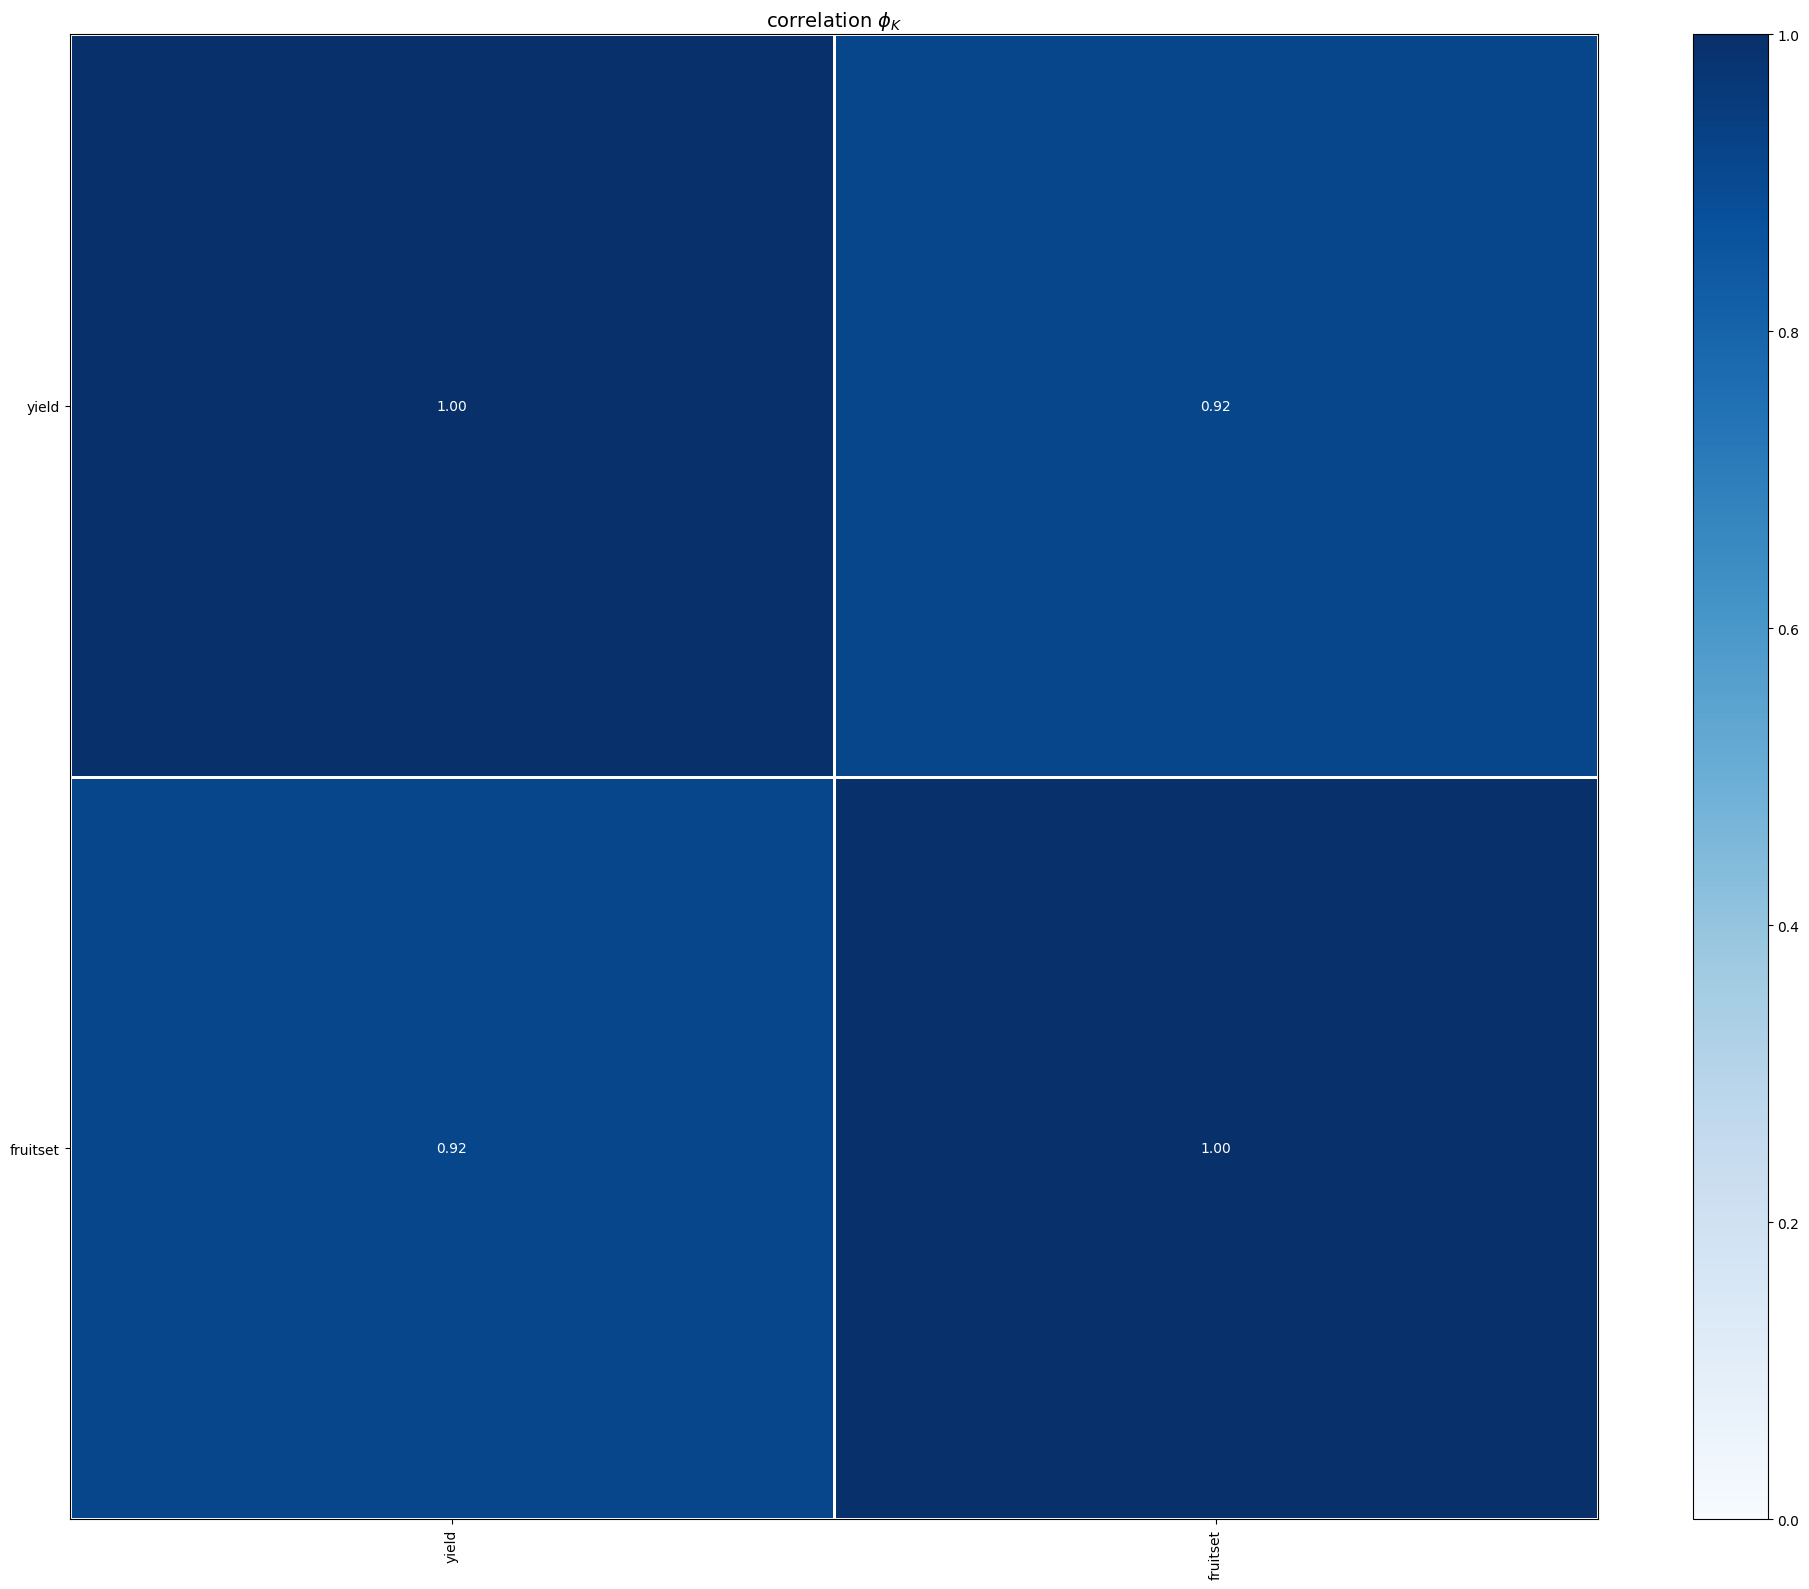

In [ ]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(20,16))
plt.tight_layout()

In [ ]:
global_correlation, global_labels = df1[df1.drop('yield', axis=1).columns.tolist()+['yield']].global_phik(interval_cols=intervals_cols)
for c, l in zip(global_correlation, global_labels):
    print(l, c[0])

fruitset 0.9174813620633483
yield 0.9174813620633483


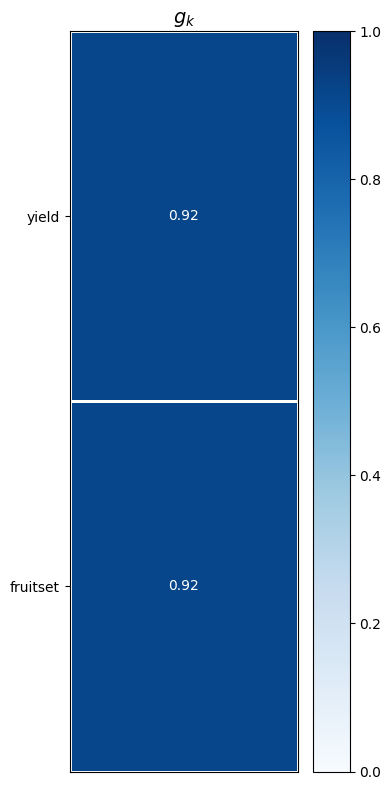

In [ ]:
plot_correlation_matrix(global_correlation, x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(4,8),
                        color_map='Blues', title=r'$g_k$',
                        fontsize_factor=1)
plt.tight_layout()

In [ ]:
significance_overview = df1[df1.drop('yield', axis=1).columns.tolist()+['yield']].significance_matrix(interval_cols=intervals_cols)

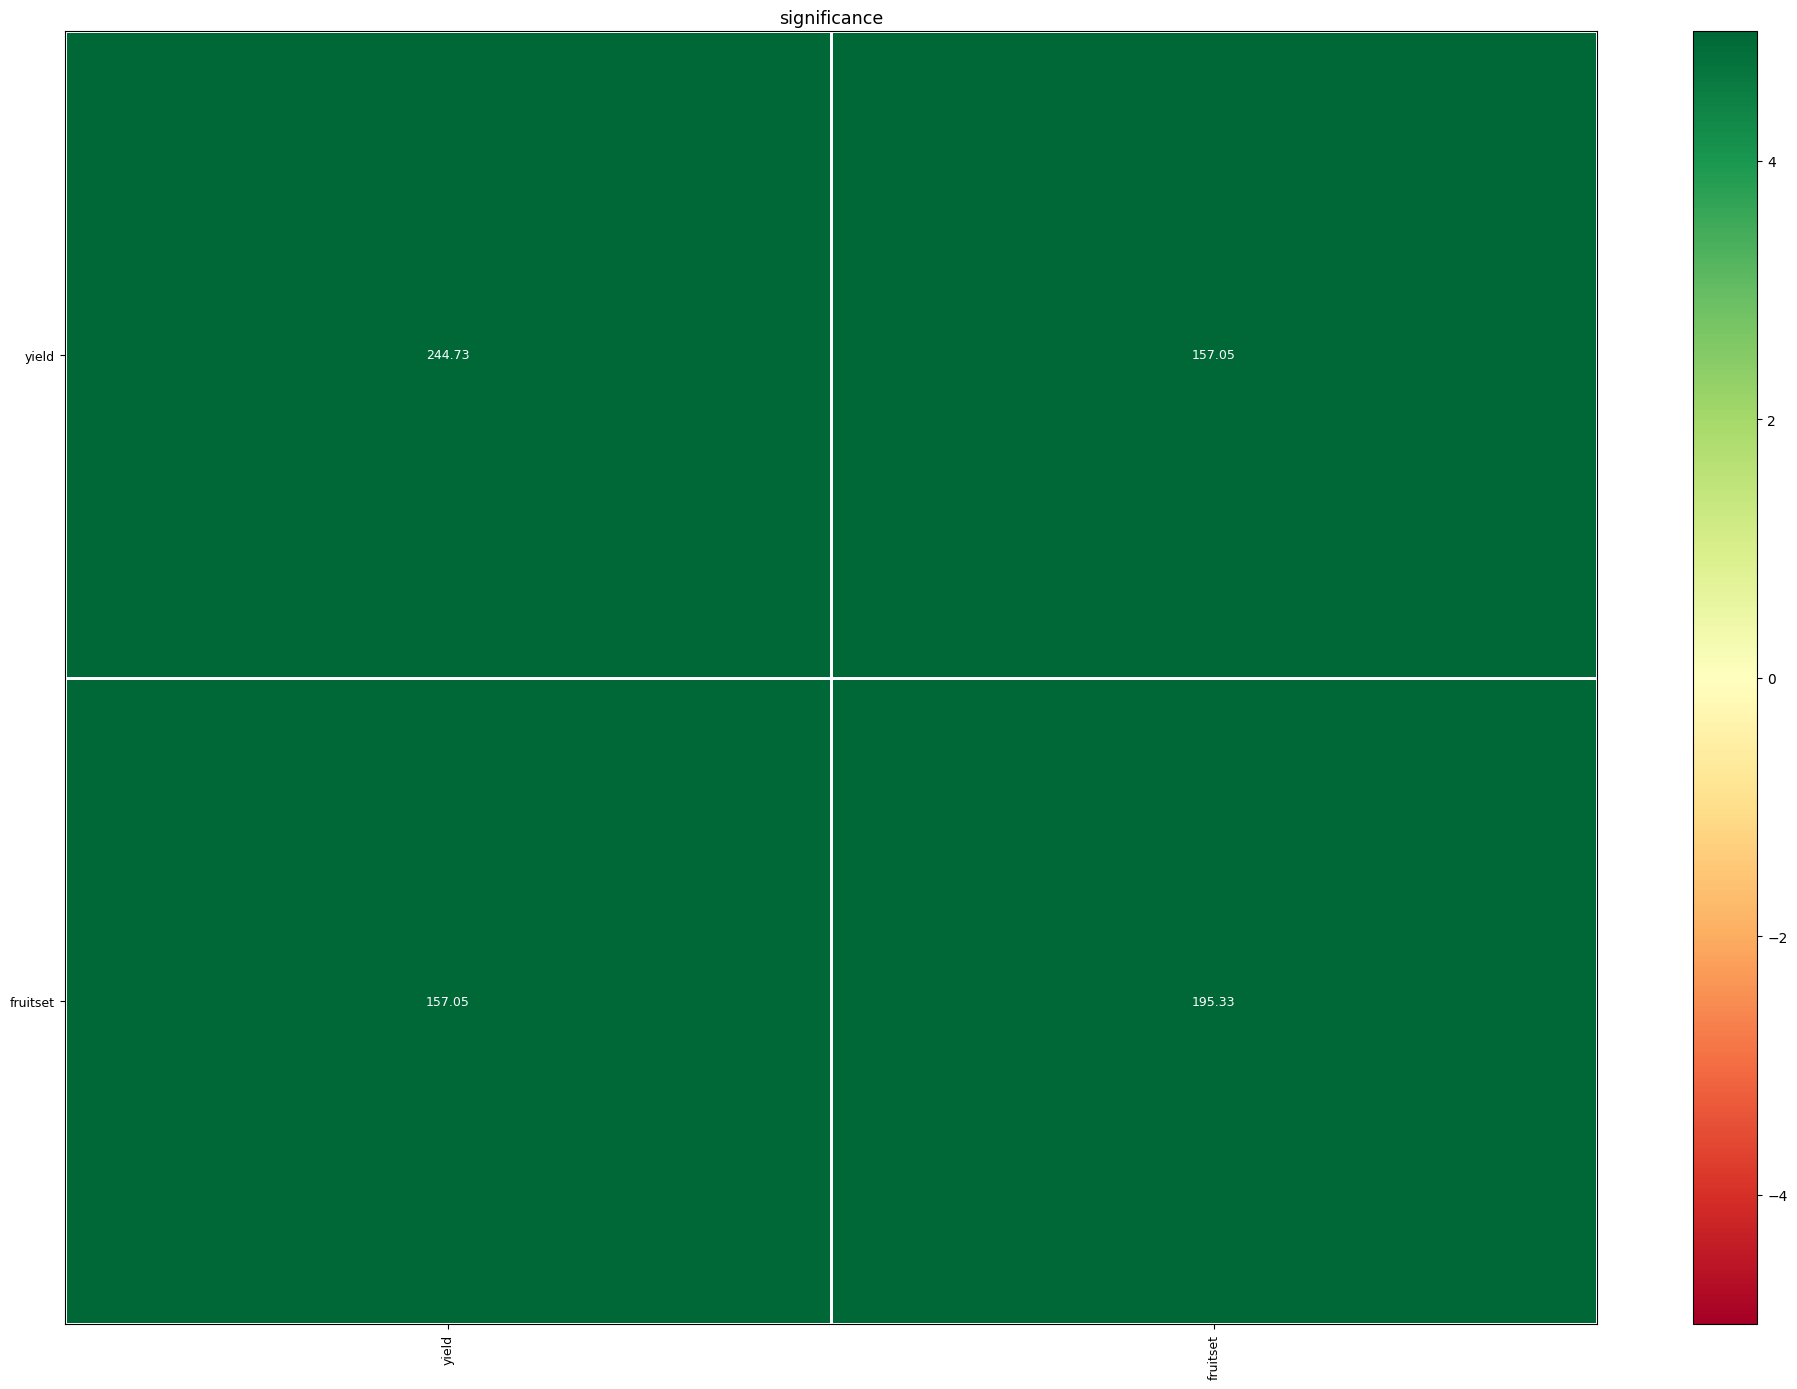

In [ ]:
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=0.9, figsize=(20,14))
plt.tight_layout()

### Eng yuqori correlatsiyalik ustunni tekshirib olamiz

In [ ]:
sns.scatterplot(x=train['yield'], y=train['fruitset'])

# Feature Engineering

In [ ]:
data = train.copy()
data1 = test.copy()
data = P6.add_useful_features(data)
data1 = P6.add_useful_features(data1)

Ko'proq ustunlar qo'shib oldik

In [ ]:
P6.check_nuns_nulls_infs(data)

In [ ]:
P6.check_nuns_nulls_infs(data1)

infinitive, null va 0 borligiga tekshirib oldik

In [ ]:
# Separate features and target
X = data.drop(columns=["yield"])
y = data["yield"]

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y, random_state=42)

# Create a DataFrame to display the mutual information scores
mi_df = pd.DataFrame({
    "Feature": X.columns,
    "Mutual Information Score": mi_scores
})

# Sort by mutual information score in descending order
mi_df = mi_df.sort_values(by="Mutual Information Score", ascending=False)

# Display the DataFrame
mi_df

,Feature,Mutual Information Score
14,fruitset,1.665339
31,Clone_FruitSet_Interaction,1.539802
28,Adjusted_FruitSet,1.498021
16,seeds,1.316866
15,fruitmass,1.123841
30,Clone_FruitMass_Interaction,1.118697
29,Adjusted_FruitMass,1.118682
27,Seed_per_FruitSet,0.625445
26,FruitMass_per_Seed,0.547470
32,FruitSet_per_BeeDensity,0.476051


Yangi ustunlar qo'shilgandan keyin ularni correlatsiyasini tekshirib olamiz

## Create models

Oddiy submission qilib ko'ramiz Random forest ustida, hozircha optimal HPO larni "colab" da topdik. Optuna orqali

In [ ]:
X = data.drop('yield', axis=1)
y = data['yield']

# Set up KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor(
    random_state=42, 
    n_jobs=-1,
    n_estimators = 131,
    max_depth = 9,
    min_samples_split = 9,
    min_samples_leaf = 8
)
model.fit(X, y)
y_pred_test = model.predict(data1)
df_submission = pd.DataFrame(pd.read_csv("test.csv")["id"])
df_submission["yield"] = y_pred_test
df_submission.to_csv("sample_submission.csv", index=False)

MAE ni "round" qilib ko'rdik foydasi yo'q ekan

### Overfittingga tekshirib ko'ramiz (Learning Curve)

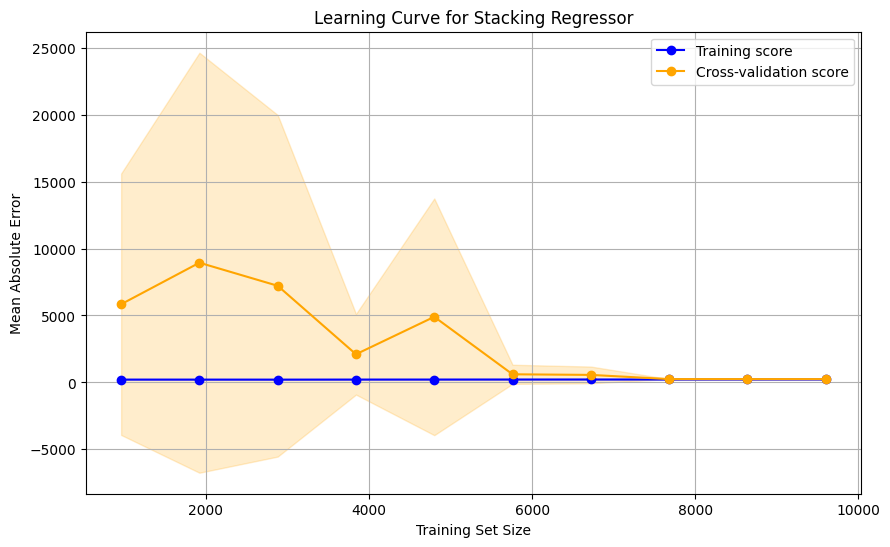

In [ ]:
# Separate features and target
X = data.drop('yield', axis=1)
y = data['yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Huber Regressor pipeline with MinMaxScaler
huber_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', HuberRegressor(
        epsilon=1.1175188294038665,
        alpha=0.00012770419443760964
    ))
])

# Initialize the RandomForestRegressor with specified parameters
random_forest = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    n_estimators=250,
    max_depth=8,
    min_samples_split=7,
    min_samples_leaf=7
)

# Define the Ridge pipeline with StandardScaler
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.9777123273142374))
])

# Define the Stacking Regressor using Ridge pipeline as the final estimator
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', random_forest),
        ('huber', huber_pipeline)  # Huber pipeline with MinMax scaling
    ],
    final_estimator=ridge_pipeline  # Ridge pipeline with Standard scaling
)

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    stacking_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Convert negative MAE scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="orange", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="orange", alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve for Stacking Regressor")
plt.legend(loc="best")
plt.grid()
plt.show()


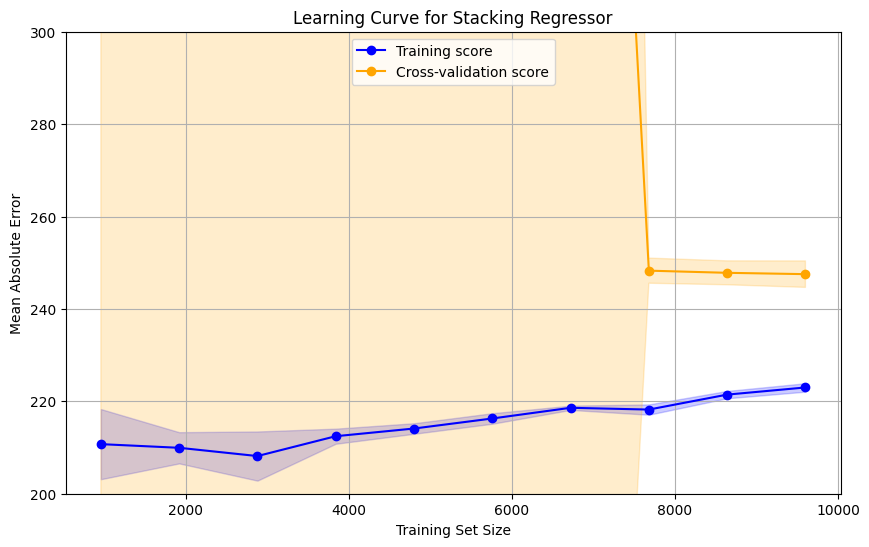

In [ ]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="orange", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="orange", alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve for Stacking Regressor")
plt.legend(loc="best")
plt.ylim(200, 300)  # Set y-axis limit
plt.grid()
plt.show()


## Feature importants

In [ ]:
# Separate features and target
X = data.drop('yield', axis=1)
y = data['yield']

# Define the Huber Regressor pipeline with MinMaxScaler
huber_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', HuberRegressor(
        epsilon=1.1175188294038665,
        alpha=0.00012770419443760964
    ))
])

# Initialize the RandomForestRegressor with specified parameters
random_forest = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    n_estimators=250,
    max_depth=8,
    min_samples_split=7,
    min_samples_leaf=7
)

# Define the Ridge pipeline with StandardScaler
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.9777123273142374))
])

# Define the Stacking Regressor using Ridge pipeline as the final estimator with internal CV
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', random_forest),
        ('huber', huber_pipeline)  # Huber pipeline with MinMax scaling
    ],
    n_jobs=-1,
    passthrough=True,
    final_estimator=ridge_pipeline,  # Ridge pipeline with Standard scaling
)

# Alternatively, fit the model on the training data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
stacking_model.fit(X_train, y_train)
y_pred_test = stacking_model.predict(X_test)

# Calculate and display the MAE and R² score on the test set
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error on the test set: {mae:.2f}")
print(f"R² Score on the test set: {r2:.2f}")


Mean Absolute Error on the test set: 247.56
R² Score on the test set: 0.92


In [ ]:
# Calculate permutation importance after fitting the model
perm_importance = permutation_importance(stacking_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Organize the feature importances into a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
}).sort_values(by='Importance Mean', ascending=False)

# Display the feature importance
print("Permutation Feature Importances:")
feature_importance_df


Permutation Feature Importances:


,Feature,Importance Mean,Importance Std
14,fruitset,1.589622e+00,0.029287
16,seeds,1.249719e-01,0.003686
15,fruitmass,1.684926e-02,0.000937
30,Clone_FruitMass_Interaction,1.340394e-02,0.000843
12,RainingDays,1.191137e-02,0.000619
29,Adjusted_FruitMass,1.048724e-02,0.000611
7,MinOfUpperTRange,9.974031e-03,0.000730
10,MinOfLowerTRange,8.471932e-03,0.000553
28,Adjusted_FruitSet,6.754798e-03,0.000511
9,MaxOfLowerTRange,6.332335e-03,0.000472


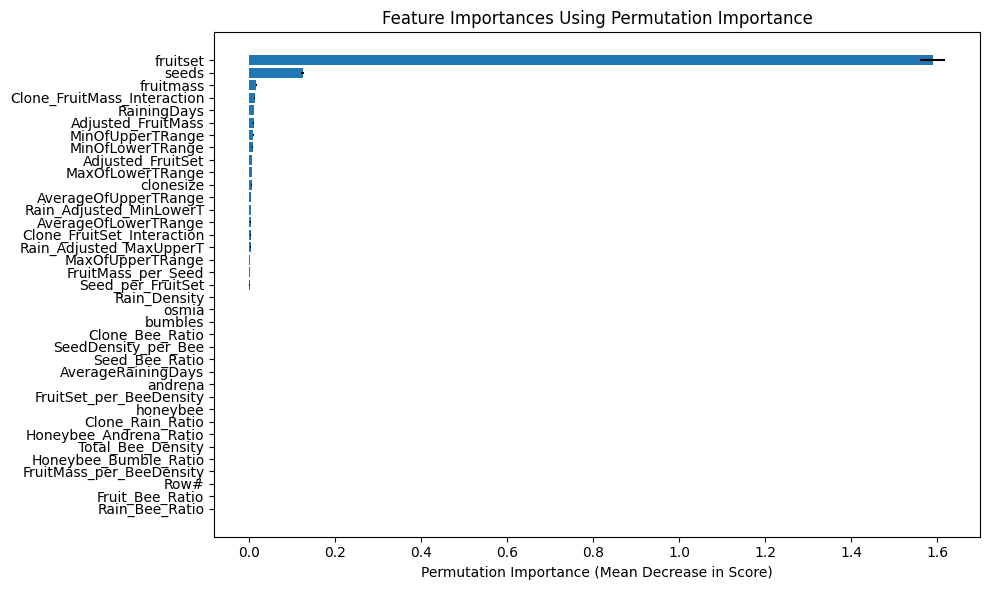

In [ ]:
# Calculate permutation importance
perm_importance = permutation_importance(stacking_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Organize the feature importances into a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
}).sort_values(by='Importance Mean', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance Mean'], xerr=feature_importance_df['Importance Std'])
plt.xlabel("Permutation Importance (Mean Decrease in Score)")
plt.title("Feature Importances Using Permutation Importance")
plt.tight_layout()
plt.show()


100%|██████████| 100/100 [07:42<00:00,  4.62s/it]


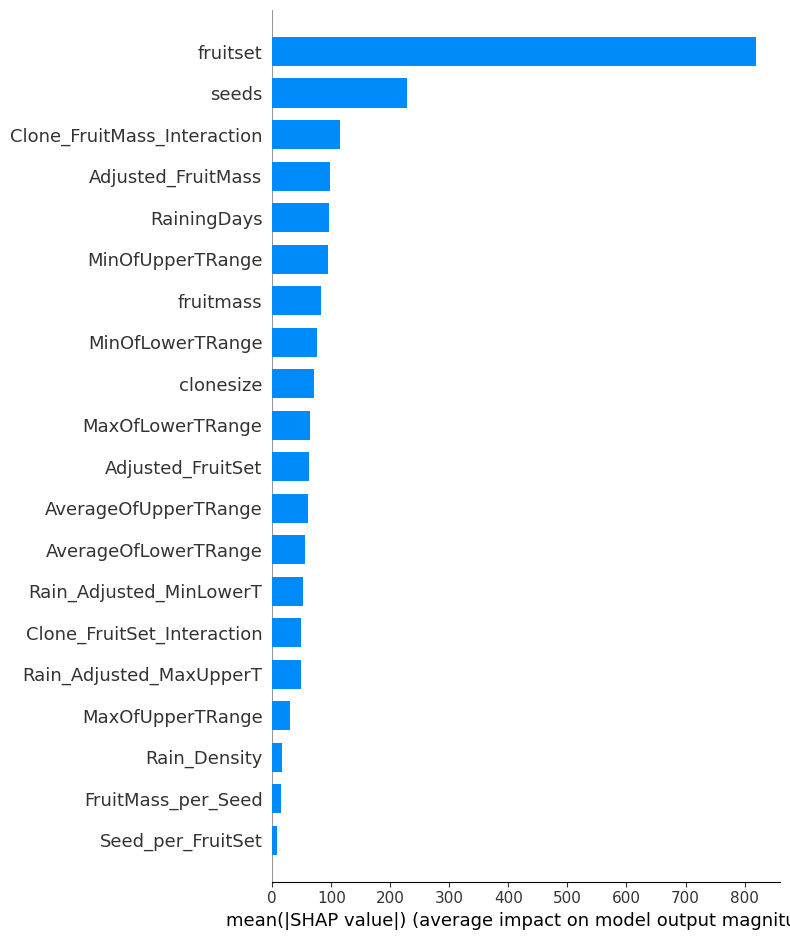

In [ ]:
# Use SHAP's KernelExplainer to interpret the stacking model
explainer = shap.KernelExplainer(stacking_model.predict, X_train[:100])  # Using a subset for efficiency
shap_values = explainer.shap_values(X_test[:100])  # Using a subset for efficiency

# Plot SHAP summary to show feature importances
shap.summary_plot(shap_values, X_test[:100], plot_type="bar")



In [ ]:
# Calculate the mean absolute SHAP values for each feature across all samples
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for feature importance based on mean absolute SHAP values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean SHAP Value': mean_abs_shap_values
}).sort_values(by='Mean SHAP Value', ascending=False)

# Display the top useful features
useful_features = feature_importance_df['Feature'].tolist()
print("Useful features ranked by SHAP importance:")
useful_features[0:8]

Useful features ranked by SHAP importance:


['fruitset',
 'seeds',
 'Clone_FruitMass_Interaction',
 'Adjusted_FruitMass',
 'RainingDays',
 'MinOfUpperTRange',
 'fruitmass',
 'MinOfLowerTRange',
 'clonesize',
 'MaxOfLowerTRange',
 'Adjusted_FruitSet',
 'AverageOfUpperTRange',
 'AverageOfLowerTRange',
 'Rain_Adjusted_MinLowerT',
 'Clone_FruitSet_Interaction',
 'Rain_Adjusted_MaxUpperT']

Random feature ni ham qo'shdik foydasi bo'lmadi

# HPO topamiz manual

In [ ]:
# Separate features and target
X = data.drop('yield', axis=1)[useful_features[0:3]]
y = data['yield']

# Initialize the RandomForestRegressor with specified parameters
random_forest = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    n_estimators=180,
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=4,
    criterion = 'absolute_error'
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the RandomForest model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_test = random_forest.predict(X_test)

# Calculate and display the MAE and R² score on the test set
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error on the test set: {mae:.2f}")
print(f"R² Score on the test set: {r2:.2f}")


Mean Absolute Error on the test set: 241.45
R² Score on the test set: 0.93
